# Creación de un algoritmo de Machine Learning para la predicción de incumplimiento de pago

### Configuración del proyecto y visualización del dataset

In [2]:
#Importamos todas las librerías necesarias para el proyecto
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Leemos el dataset
data = pd.read_csv('data.csv')

### Análisis exploratorio

In [4]:
#Visualización de los headers del dataset
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
#Simplificación de las columnas relevantes del dataset
relevant_columns = ["ID", "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", 
                    "PAY_0", "BILL_AMT1", "PAY_AMT1", "default.payment.next.month"]

#Asignamos una variable con las columnas relevantes y muestra las primeras 5 filas
relevant_data = data.loc[:, relevant_columns].head()

In [6]:
#Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
#Obtenemos la estadística descriptiva del dataset
relevant_data


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,default.payment.next.month
0,1,20000.0,2,2,1,24,2,3913.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2682.0,0.0,1
2,3,90000.0,2,2,2,34,0,29239.0,1518.0,0
3,4,50000.0,2,2,1,37,0,46990.0,2000.0,0
4,5,50000.0,1,2,1,57,-1,8617.0,2000.0,0


In [8]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
#Búsqueda de valores nulos
relevant_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
BILL_AMT1                     0
PAY_AMT1                      0
default.payment.next.month    0
dtype: int64

#### Gráficas resultantes del Análisis Exploratorio de los Datos

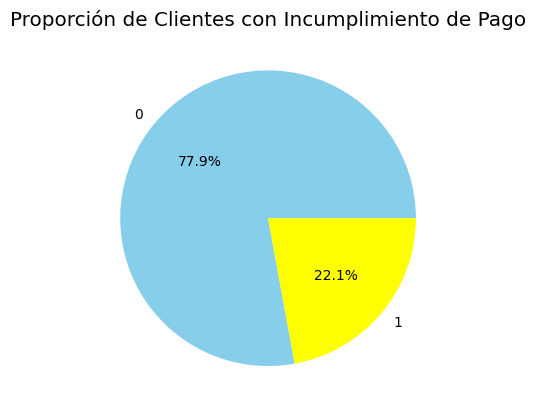

In [10]:
# Gráfico de tarta para la variable objetivo
data['default.payment.next.month'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'yellow'])
plt.title('Proporción de Clientes con Incumplimiento de Pago')
plt.ylabel('')
plt.show()


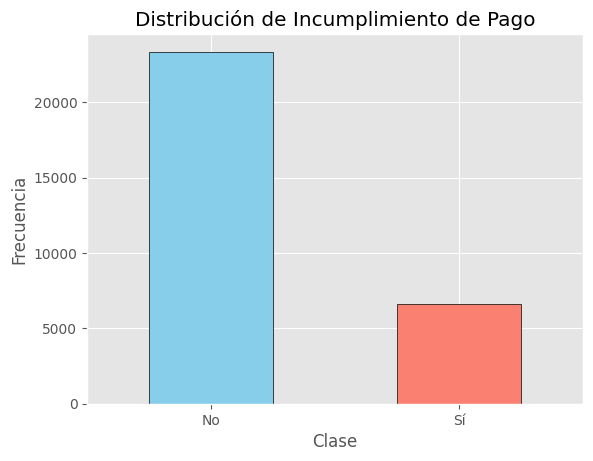

In [11]:
data['default.payment.next.month'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Distribución de Incumplimiento de Pago')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No', 'Sí'], rotation=0)
plt.show()


### Separación de los datos de entrenamiento y prueba
La variable objetivo es default.payment.next.month por lo tanto debemos ver sus posibles salidas: probabilidad de incumplir o no con el pago.

Esto lo hacemos para verificar cuántos resultados de cada salida tenemos y el porcentaje de cada variable

In [12]:
data['default.payment.next.month'].value_counts()


default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

In [13]:
#Identificamos la columna objetivo y en base a su tamaño podemos contar cuántos valores hay de cada tipo
data.groupby('default.payment.next.month').size()


default.payment.next.month
0    23364
1     6636
dtype: int64

In [14]:
#Sacamos el porcentaje de representación de cada variable con respecto a nuestro conjunto de datos
100 * (data.groupby('default.payment.next.month').size() / len(data))


default.payment.next.month
0    77.88
1    22.12
dtype: float64

In [15]:
# Separamos las variables independientes (X) de la variable a predecir (y). y es nuestra target variable o variable objetivo
X = np.array(data.drop(['default.payment.next.month'],axis=1))
y = np.array(data['default.payment.next.month'])
X.shape

(30000, 24)

Una vez que tenemos nuestras clases definidas y las variables separadas ahora si toca definir el porcentaje de datos para entrenamiento y prueba

In [16]:
''' Uso de train_test_split:
X = variables independientes. Previamente definida
Y = target variable o variable a predecir. Previamente definida
test_size = tamaño del conjunto de prueba. 20% para este caso.
random_state = representa un número aleatorio que se utiliza para asegurarse de que la división de los datos sea siempre la misma. También llamado seed.
'''

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.2, random_state=73)

''' Resultados del método:
X_train y y_train: Representa el 80% de los datos de prueba y se utilizan para entrenar el modelo.
X_test y y_test: Representa el 20% de los datos de prueba y se utilizan para evaluar el modelo
'''


' Resultados del método:\nX_train y y_train: Representa el 80% de los datos de prueba y se utilizan para entrenar el modelo.\nX_test y y_test: Representa el 20% de los datos de prueba y se utilizan para evaluar el modelo\n'

### Regresión Logística

#### Creación y Entrenamiento del modelo

In [17]:
'''Creación de un objeto tipo LogisticRegression. Este objeto hereda las propiedades de la clase LogisticRegression
Y al instanciarlo nos permitirá entrenar, predecir y evaluar nuestro modelo'''
model = linear_model.LogisticRegression()

In [18]:
# Utilizamos fit para hacer el entrenamiento del modelo
model.fit(X_train,y_train)

LogisticRegression()

#### Predicciones

In [19]:
# Realizar predicciones con el modelo entrenado
predictions = model.predict(X_test)

# Mostrar las primeras 5 predicciones
print(predictions[:5])


[0 0 0 0 0]


#### Evaluación del Modelo

In [20]:
'''Evaluar la exactitud del modelo
Calcular la predicción del modelo de x con respecto de y
Como el resultado es 78% podemos es buena pero no es tan precisa.'''

accuracy = model.score(X_test, y_test) * 100
print(f"Exactitud: {accuracy}")

Exactitud: 77.85


In [21]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

print(conf_matrix)


[[4671    1]
 [1328    0]]


In [22]:
#Reporte de Clasificación
report = classification_report(y_test, predictions)
print(report)


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4672
           1       0.00      0.00      0.00      1328

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



In [23]:
# Mostrar los coeficientes del modelo
print(model.coef_)


[[-2.56497904e-05 -3.97361553e-06 -4.47454006e-07 -4.96104498e-07
  -4.68233212e-07 -6.08955463e-06  1.23278801e-06  9.59622707e-07
   8.28807069e-07  7.85115597e-07  7.00088928e-07  6.37660820e-07
  -1.02537254e-05  5.74252371e-06  2.51629563e-06  2.17142067e-06
   1.73541705e-06  2.85047663e-06 -3.84168753e-05 -2.20374694e-05
  -9.40117030e-06 -9.23518636e-06 -4.77197494e-06 -2.40710972e-06]]


#### Optimización del modelo utilizando K-Fold

In [24]:
#Iniciamos nuevamente dividiendo el conjunto de datos para entrenamiento y prueb

# Separamos las variables independientes (X) y la variable objetivo (y)
X = data.drop(['default.payment.next.month'], axis=1)
y = data['default.payment.next.month']

# Dividimos el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

In [25]:
from sklearn.linear_model import LogisticRegression

# Creamos el modelo de regresión logística nuevamente 
model = LogisticRegression(max_iter=1000)  # Esta vez damos un máximo de iteraciones de 1000


In [26]:
from sklearn.model_selection import KFold

# Definimos la cantidad de "folds" o subgrupos para nuestro conjunto de pruebas
kfold = KFold(n_splits=10, shuffle=True, random_state=37)


In [28]:
from sklearn.model_selection import cross_val_score

# Realizar la técnica de validación cruzada para obtener la exactitud en cada fold
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# Ver los resultados de la validación cruzada
print(cv_results)


[0.81041667 0.805      0.79666667 0.80041667 0.80583333 0.81041667
 0.81458333 0.81416667 0.80625    0.8025    ]


In [29]:
# Verificación del promedio y la desviación estándar de los resultados
print("Exactitud media: ", cv_results.mean())
print("Desviación estándar: ", cv_results.std())


Exactitud media:  0.806625
Desviación estándar:  0.005541666666666678


In [30]:
# Entrenamos el modelo con todos los datos de entrenamiento
model.fit(X_train, y_train)

# Evaluamos el modelo en el conjunto de prueba
accuracy = model.score(X_test, y_test) * 100
print(f"Exactitud: {accuracy}")



Exactitud: 80.15


In [31]:
# Calcular la matriz de confusión
from sklearn.metrics import confusion_matrix

# Realizar las predicciones con el nuevo conjunto de prueba
y_pred = model.predict(X_test)

In [32]:
# Generamos la nueva matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[4578  101]
 [1090  231]]


In [33]:
#Crear un nuevo reporte de clasificación
report = classification_report(y_test, y_pred)

# Mostrar el reporte
print("Reporte de Clasificación:")
print(report)



Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.98      0.88      4679
           1       0.70      0.17      0.28      1321

    accuracy                           0.80      6000
   macro avg       0.75      0.58      0.58      6000
weighted avg       0.78      0.80      0.75      6000



### Árbol de decisiones

#### Creación y Entrenamiento del modelo

In [34]:
#Importar las librerías
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [35]:
# Crear el modelo de árbol de decisión
# Cómo ya hubo división del conjunto de datos vamos a tomar las mismas variables y a partir de ahí comenzar con el modelo (X_train, y_train, X_test, y_test).

dt_model = DecisionTreeClassifier(random_state=37)

# Entrenar el modelo con los datos de entrenamiento que previamente separamos
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=37)

#### Predicciones 

In [36]:
# Realizar predicciones en el conjunto de prueba
dt_predictions = dt_model.predict(X_test)


#### Evaluación del modelo

In [37]:
# Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, dt_predictions))


Matriz de Confusión:
[[3814  865]
 [ 795  526]]


In [38]:
# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, dt_predictions))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4679
           1       0.38      0.40      0.39      1321

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.72      0.73      6000



In [39]:
# Exactitud
dt_accuracy = dt_model.score(X_test, y_test) * 100
print(f"Exactitud del Árbol de Decisión: {dt_accuracy}")

Exactitud del Árbol de Decisión: 72.33333333333334


#### Interpretación del modelo con una sola muestra

In [40]:
'''A continuación vamos a utilizar el modelo para comprobar si una persona en específico si cumplirá o no con el pago.
    Para ello necesitamos extraer una sola muestra del conjunto de datos''' 

# Seleccionamos un registro aleatorio del conjunto de datos
muestra = X_test.sample()
#Mostramos los datos de la muestra extraída del dataset
muestra

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
23413,23414,200000.0,2,2,1,34,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
'''El arreglo resultante expresa las probabilidades de incumplimiento.
    Clase 0: No incumplirá con el pago.
    Clase 1: Incumplirá con el pago'''
dt_model.predict_proba(muestra)

array([[1., 0.]])

In [42]:
# Imprimimos la probabilidad final de la muestra por clase
clases = ['No incumplirá el pago', 'Incumplirá el pago']
probabilidades = dt_model.predict_proba(muestra)[0] * 100
print(f"Probabilidad de {clases[0]}: {probabilidades[0]:.2f}%")
print(f"Probabilidad de {clases[1]}: {probabilidades[1]:.2f}%")

clase_predicha = clases[dt_model.predict(muestra)[0]]
print(f"Predicción final: {clase_predicha}")

Probabilidad de No incumplirá el pago: 100.00%
Probabilidad de Incumplirá el pago: 0.00%
Predicción final: No incumplirá el pago


#### Gráfica del árbol de decisiones

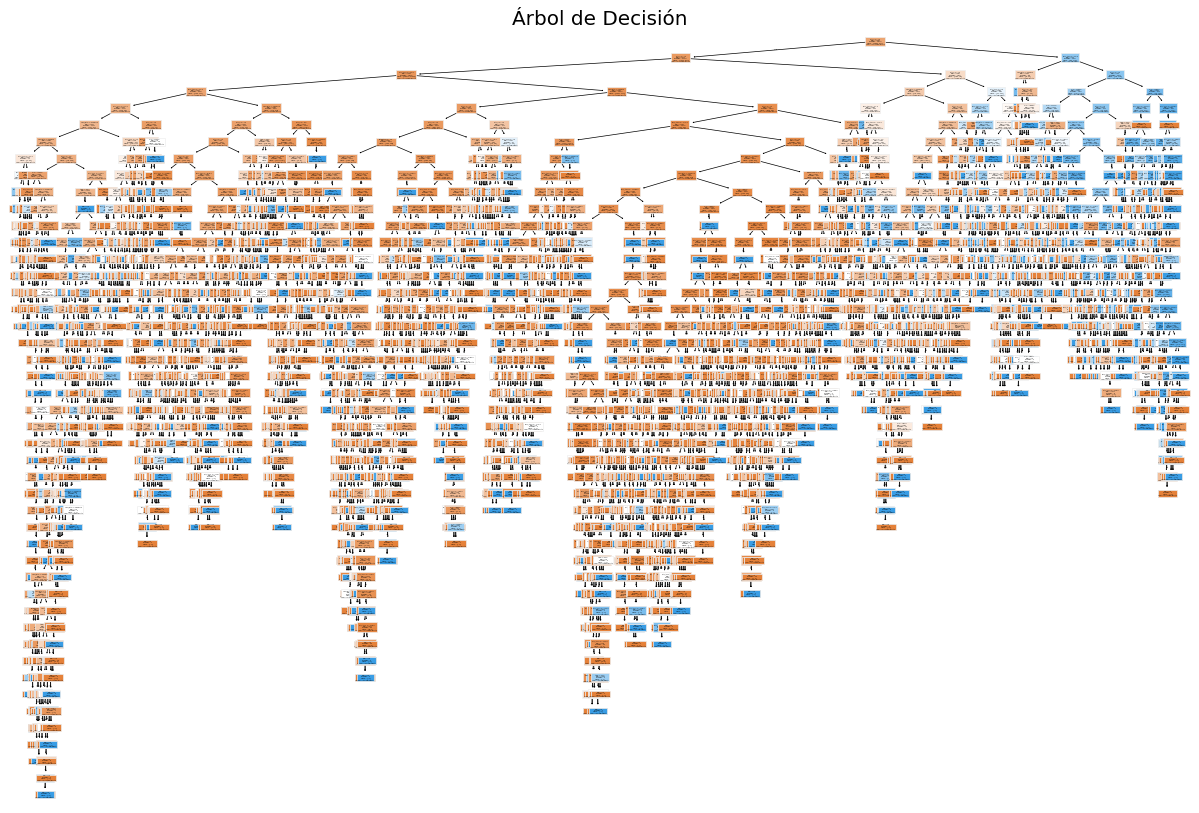

In [307]:
''' Este modelo del árbol de decisiones va a tardar mucho tiempo en graficar cada decisión ya que tiene que pasar por cada variable y tomar una decisión.
'''
import matplotlib.pyplot as plt

# Dibujar el árbol
plt.figure(figsize=(15, 10))
tree.plot_tree(
    dt_model, 
    feature_names=data.drop(['default.payment.next.month'], axis=1).columns,
    class_names=['No Incumplimiento', 'Incumplimiento'],
    filled=True
)
plt.title("Árbol de Decisión")
plt.show()


### Árbol de decisión con profundidad limitada

#### Creación y Entrenamiento del modelo limitado

In [43]:
'''Ahora mostramos el árbol de decisiones con una profundidad limitada a 3 niveles para poder distinguir las decisiones.
    Para ello basta con volver a crear el modelo pero agregamos el parámetro max_depth=3 para que únicamente muestre 3 niveles de decisión
'''
dt_model_limited = DecisionTreeClassifier(max_depth=3, random_state=37)
dt_model_limited.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=37)

#### Predicciones

In [44]:
# Realizar predicciones en el conjunto de prueba
dt_predictions_limited = dt_model_limited.predict(X_test)

#### Evaluación del modelo limitado

In [45]:
# Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, dt_predictions_limited))

Matriz de Confusión:
[[4420  259]
 [ 851  470]]


In [46]:
# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, dt_predictions_limited))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4679
           1       0.64      0.36      0.46      1321

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000



In [47]:
# Exactitud
dt_accuracy = dt_model_limited.score(X_test, y_test) * 100
print(f"Exactitud del Árbol de Decisión: {dt_accuracy}")

Exactitud del Árbol de Decisión: 81.5


#### Interpretación del modelo limitado con una sola muestra 

In [48]:
'''A continuación vamos a utilizar el modelo para comprobar si una persona en específico si cumplirá o no con el pago.
    Para ello necesitamos extraer una sola muestra del conjunto de datos''' 

# Seleccionamos un registro aleatorio del conjunto de datos
muestra_limitada = X_test.sample()
#Mostramos los datos de la muestra extraída del dataset
muestra_limitada

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
11286,11287,200000.0,2,3,1,42,0,0,0,0,...,1408.0,1800.0,819.0,886.0,1345.0,1108.0,669.0,0.0,886.0,2415.0


In [49]:
'''El arreglo resultante expresa las probabilidades de incumplimiento.
    Clase 0: No incumplirá con el pago.
    Clase 1: Incumplirá con el pago'''
dt_model_limited.predict_proba(muestra_limitada)

array([[0.7854907, 0.2145093]])

In [50]:
# Imprimimos la probabilidad final de la muestra por clase
clases = ['No incumplirá el pago', 'Incumplirá el pago']
probabilidades = dt_model_limited.predict_proba(muestra_limitada)[0] * 100
print(f"Probabilidad de {clases[0]}: {probabilidades[0]:.2f}%")
print(f"Probabilidad de {clases[1]}: {probabilidades[1]:.2f}%")

clase_predicha = clases[dt_model_limited.predict(muestra_limitada)[0]]
print(f"Predicción final: {clase_predicha}")

Probabilidad de No incumplirá el pago: 78.55%
Probabilidad de Incumplirá el pago: 21.45%
Predicción final: No incumplirá el pago


#### Gráficas del árbol de decisión

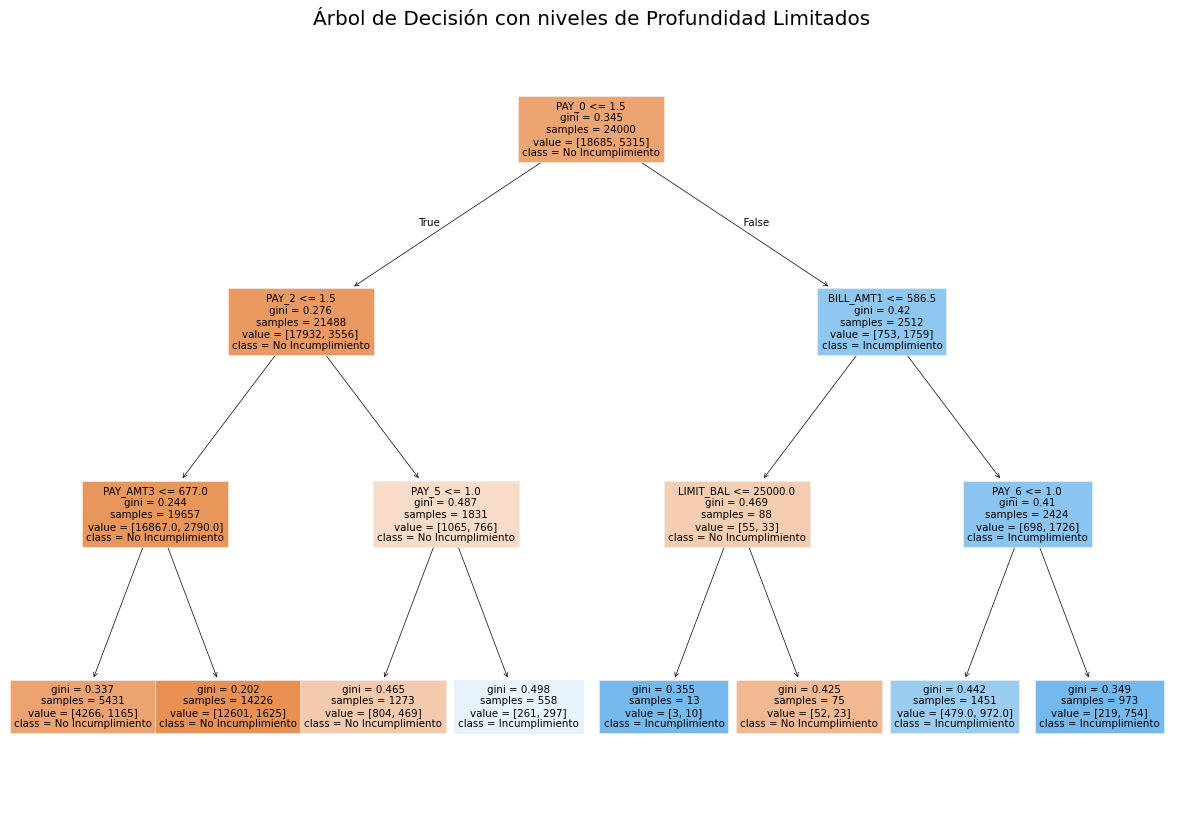

In [51]:
# Visualizar el árbol con menos niveles de profundidad
plt.figure(figsize=(15, 10))
tree.plot_tree(
    dt_model_limited, 
    feature_names=data.drop(['default.payment.next.month'], axis=1).columns,
    class_names=['No Incumplimiento', 'Incumplimiento'],
    filled=True
)
plt.title("Árbol de Decisión con niveles de Profundidad Limitados")
plt.show()
